In [2]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns

In [85]:
# Loading the ProvincePopulation and SouthAfricaCrimeStats datasets

ProvinPop = pd.read_csv('ProvincePopulation.csv').sort_values('Province')
SA_Crime = pd.read_csv('SouthAfricaCrimeStats_v2.csv')

In [86]:
# Printing the SA_Crime dataset
SA_Crime.head()

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030


In [87]:
# Printing the Popluation dataset
ProvinPop

,Province,Population,Area,Density
5,Eastern Cape,6562053,168966,38.8
7,Free State,2745590,129825,21.1
0,Gauteng,12272263,18178,675.1
1,Kwazulu/Natal,10267300,94361,108.8
4,Limpopo,5404868,125755,43.0
2,Mpumalanga,4039939,76495,52.8
6,North West,3509953,104882,33.5
8,Northern Cape,1145861,372889,3.1
3,Western Cape,5822734,129462,45.0


# Q_1a 
* Joining Population data with crime statistics table

In [89]:
# Combining the two datasets

#combine_datasets = pd.concat([SA_Crime, ProvinPop], sort=True)
######################################################################

combine_datasets = pd.merge(ProvinPop, SA_Crime, on = 'Province')

########################################################################
#combine_datasets = combine_datasets.set_index('Province') 

combine_datasets.head()

,Province,Population,Area,Density,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Eastern Cape,6562053,168966,38.8,East London,All theft not mentioned elsewhere,2892,2432,2058,1892,1582,1567,1498,1251,1618,1394,1268
1,Eastern Cape,6562053,168966,38.8,Humewood,All theft not mentioned elsewhere,2585,2276,1889,1712,1288,1569,1294,1236,1408,1132,1044
2,Eastern Cape,6562053,168966,38.8,Mount Road,All theft not mentioned elsewhere,2234,2257,2288,2104,1657,1734,1419,1424,1456,1392,1239
3,Eastern Cape,6562053,168966,38.8,Cambridge,All theft not mentioned elsewhere,1478,1624,1280,1345,1280,1359,1306,1174,1141,913,771
4,Eastern Cape,6562053,168966,38.8,Walmer,Burglary at residential premises,1467,1546,1068,976,703,785,802,998,830,982,866


# Q_1b
* Grouping combine_datasets by: Province and sum crimes over each year

In [113]:
# Grouping the data set and summing the crimes over each year

Group_datasets_Prov = combine_datasets.pivot_table(index='Province', aggfunc=np.sum)

Group_datasets_Prov.reset_index(inplace = True)
Group_datasets_Prov

,Province,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,Area,Density,Population
0,Eastern Cape,238977,228884,220813,216658,217230,215012,214462,209124,210248,202582,196089,894168072,205329.6,34726384476
1,Free State,137987,128227,127955,132335,127512,121997,126389,131785,126290,118879,117688,385580250,62667.0,8154402300
2,Gauteng,654817,639635,615618,638186,640074,609305,577959,584315,636195,637332,622218,70185258,2606561.1,47383207443
3,Kwazulu/Natal,345784,343798,328368,340095,349103,343767,348411,362677,355729,348394,342772,473880942,546393.6,51562380600
4,Limpopo,106983,104857,97166,97565,99610,96475,113630,112952,117638,124986,129323,336143115,114939.0,14447212164
5,Mpumalanga,134829,131444,125954,131410,128814,122402,122186,121169,115996,117203,119526,177621390,122601.6,9380738358
6,North West,118840,112471,112340,117118,115680,109922,111028,115319,113935,114270,114335,232208748,74169.0,7771035942
7,Northern Cape,56515,52689,48954,50277,49746,45618,45257,47697,48947,49897,50665,916188273,7616.7,2815380477
8,Western Cape,381825,396712,395281,398240,417619,426850,447238,465994,479022,492963,490383,524321100,182250.0,23582072700


# Q1_c
* What is the most dangerous province overall

In [67]:
# Dropping some columns to make the datasets 

New_datasets_Prov = Group_datasets_Prov.drop(columns=['Population','Density', 'Area'])
#New_datasets_Prov

# Finding and Returning index of first occurrence of maximum over requested axis (Province).

New_datasets_Prov.idxmax(axis=0,skipna=True)


2005-2006    Gauteng
2006-2007    Gauteng
2007-2008    Gauteng
2008-2009    Gauteng
2009-2010    Gauteng
2010-2011    Gauteng
2011-2012    Gauteng
2012-2013    Gauteng
2013-2014    Gauteng
2014-2015    Gauteng
2015-2016    Gauteng
dtype: object

In [68]:
# Returning the maximum number along the Province.

Max = np.max(New_datasets_Prov, axis=1)
Max

Province
Eastern Cape     238977.0
Free State       137987.0
Gauteng          654817.0
Kwazulu/Natal    362677.0
Limpopo          129323.0
Mpumalanga       134829.0
North West       118840.0
Northern Cape     56515.0
Western Cape     492963.0
dtype: float64

In [70]:
# Returning index of first occurrence of maximum
Dangerous_Prov = Max.idxmax()

# Printing the Dangerous Province using the maximum crime occured in all Provinces.
print(Dangerous_Prov, Max.max())

Gauteng 654817.0


# Q1_d
* Ranking the average crimes per year for all crime types

In [110]:
# Dropping some columns to make the dataset compact and easy viewing

New_combine = combine_datasets.drop(columns=['Area', 'Density','Population', 'Station'])

# Re-Grouping the dataset into Categories or type of Crimes
New_combine = New_combine.pivot_table(index="Category")

# Ranking the average crimes for all crimes

New_combine = New_combine.rank(method = 'average', ascending=True)

New_combine.head()

,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
Category,,,,,,,,,,,
All theft not mentioned elsewhere,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
Arson,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0
Assault with the intent to inflict grievous bodily harm,25.0,25.0,25.0,25.0,25.0,25.0,25.0,24.0,24.0,24.0,24.0
Attempted murder,11.0,11.0,11.0,10.0,10.0,9.0,8.0,9.0,8.0,8.0,8.0
Bank robbery,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0


# Q2_a
* Contrasting the volume vs density of crimes

In [98]:
#combine_datasets['Province']='Eastern Cape'
#combine_datasets.head()

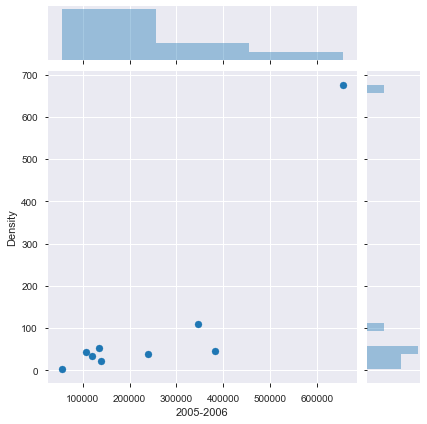

In [80]:
#sns.distplot(combine_datasets['Density'], kde = True, bins = 10, hist = False)
sns.jointplot(x = '2005-2006', y = 'Density', data = Alt_Group_Prov)

In [74]:
#with sns.axes_style("white"):
#    sns.jointplot(x= ', y='Density', kind="kde",color="b");

# Q2_b
* Compare population density and crime rate - do places with higher
  population density tend to have higher crime rates (correlation)?

In [121]:
# Iterating over the years and convert it into string

columns = [str(year)+'-'+str(year+1) for year in range(2005, 2016)]
#columns

#Grouping by Province  
Combined_data_sum = combine_datasets.groupby(['Province'],sort=False)[columns].agg('sum').reset_index()

In [127]:
Data_Province_Allcrimes = Combined_data_sum.sum(axis=1).reset_index()
Data_Province_Allcrimes

['2005-2006',
 '2006-2007',
 '2007-2008',
 '2008-2009',
 '2009-2010',
 '2010-2011',
 '2011-2012',
 '2012-2013',
 '2013-2014',
 '2014-2015',
 '2015-2016']

In [124]:
# Re_assigning of the ProvincePopulation.csv

Data_withcrimes = ProvinPop

In [130]:
# Creating a new Column called 'Crimes'  and appending the total crime rate
Data_withcrimes['Crimes'] = [int(i) for i in Data_Province_Allcrimes[0]]
Data_withcrimes

,Province,Population,Area,Density,Crimes
5,Eastern Cape,6562053,168966,38.8,2370079
7,Free State,2745590,129825,21.1,1397044
0,Gauteng,12272263,18178,675.1,6855654
1,Kwazulu/Natal,10267300,94361,108.8,3808898
4,Limpopo,5404868,125755,43.0,1201185
2,Mpumalanga,4039939,76495,52.8,1370933
6,North West,3509953,104882,33.5,1255258
8,Northern Cape,1145861,372889,3.1,546262
3,Western Cape,5822734,129462,45.0,4792127


In [132]:
# Finding the correlation between the Population Density and crime rate

Data_withcrimes['Density'].corr(Data_withcrimes['Crimes'])

# It turns out that places with high population density have high crime rate

0.8026935150103421

# Q_3a
* Group by Crime type

In [138]:
Data_Crimetype = combine_datasets.groupby('Category')
Data_Crimetype.first()

,Province,Population,Area,Density,Station,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
Category,,,,,,,,,,,,,,,,
All theft not mentioned elsewhere,Eastern Cape,6562053,168966,38.8,East London,2892,2432,2058,1892,1582,1567,1498,1251,1618,1394,1268
Arson,Eastern Cape,6562053,168966,38.8,Kwazakele,45,37,36,30,24,34,30,20,22,18,20
Assault with the intent to inflict grievous bodily harm,Eastern Cape,6562053,168966,38.8,Kwanobuhle,950,925,1087,895,668,567,535,520,458,435,387
Attempted murder,Eastern Cape,6562053,168966,38.8,Mthatha,142,85,82,68,71,69,71,75,11,45,52
Bank robbery,Eastern Cape,6562053,168966,38.8,Ilinge,1,0,0,0,0,0,0,0,0,0,0
Burglary at non-residential premises,Eastern Cape,6562053,168966,38.8,Mount Road,848,988,973,694,740,589,448,500,514,569,529
Burglary at residential premises,Eastern Cape,6562053,168966,38.8,Walmer,1467,1546,1068,976,703,785,802,998,830,982,866
Carjacking,Eastern Cape,6562053,168966,38.8,Kwazakele,100,112,77,108,96,77,120,101,104,88,135
Commercial crime,Eastern Cape,6562053,168966,38.8,Mthatha,563,406,400,710,1023,1087,1185,1280,385,99,89


# Q_3b
* In which provinces does drug-related crime occur more than 1000
    times a year (on average).

In [140]:
# Drug Related crimes in the combined datasets
Data_Drugs_Related = combine_datasets.loc[combine_datasets['Category'] == 'Drug-related crime']
Data_Drugs_Related.head()

,Province,Population,Area,Density,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
156,Eastern Cape,6562053,168966,38.8,Kwanobuhle,Drug-related crime,359,540,445,455,621,393,395,506,619,687,737
158,Eastern Cape,6562053,168966,38.8,Humewood,Drug-related crime,358,162,139,194,149,154,204,217,263,320,320
201,Eastern Cape,6562053,168966,38.8,New Brighton,Drug-related crime,289,100,124,152,153,183,243,243,315,329,340
208,Eastern Cape,6562053,168966,38.8,Kamesh,Drug-related crime,283,374,1019,1154,919,871,705,699,697,735,739
224,Eastern Cape,6562053,168966,38.8,Gelvandale,Drug-related crime,267,184,181,194,258,273,421,559,676,749,630


In [144]:
# Printing all the Drug Related Crimes 

Data_Drugs_Related_Prov =Data_Drugs_Related.loc[(combine_datasets['2005-2006']>1000) | (combine_datasets['2006-2007']>1000) |(combine_datasets['2007-2008']>1000)|(combine_datasets['2008-2009']>1000)|(combine_datasets['2009-2010']>1000)|(combine_datasets['2010-2011']>1000) |(combine_datasets['2011-2012']>1000)|(combine_datasets['2012-2013']>1000)|(combine_datasets['2013-2014']>1000)|(combine_datasets['2014-2015']>1000)|(combine_datasets['2015-2016']>1000)]
Data_Drugs_Related_Prov.head()

,Province,Population,Area,Density,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
208,Eastern Cape,6562053,168966,38.8,Kamesh,Drug-related crime,283,374,1019,1154,919,871,705,699,697,735,739
8394,Gauteng,12272263,18178,675.1,Pretoria Central,Drug-related crime,908,499,693,617,680,629,908,1164,1620,2122,2116
8550,Gauteng,12272263,18178,675.1,Meadowlands,Drug-related crime,604,124,102,80,146,254,274,399,969,1429,959
8644,Gauteng,12272263,18178,675.1,Moroka,Drug-related crime,509,616,480,400,399,334,288,369,1279,1571,1846
8770,Gauteng,12272263,18178,675.1,Katlehong,Drug-related crime,404,169,192,192,203,186,237,400,1527,1461,1375


In [153]:
# Summing the Data Related Drugs
Data_Prov_Drugs_Related_sum = Data_Drugs_Related_Prov.groupby(['Province'],sort=False)[columns].agg('sum')

Data_Prov_Drugs_Related_sum.head()


,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
Province,,,,,,,,,,,
Eastern Cape,283,374,1019,1154,919,871,705,699,697,735,739
Gauteng,5904,5169,5306,5583,6125,7337,12472,19219,36353,34656,26693
Kwazulu/Natal,9328,10558,9121,8539,10162,11721,13448,14645,16330,16918,15909
North West,295,487,582,536,802,627,706,1039,1224,1142,1195
Western Cape,17559,21237,24790,29343,34438,41087,45806,49377,49682,51115,54100


# Q3_c
* Which Province has the highest number of stations?

In [156]:
Data_stations = combine_datasets.groupby(['Station'],sort=False)
#Data_stations.tail()

In [157]:
for i in Data_withcrimes['Province']:
    print((i,list(combine_datasets['Province']).count(i)))

('Eastern Cape', 5292)
('Free State', 2970)
('Gauteng', 3861)
('Kwazulu/Natal', 5022)
('Limpopo', 2673)
('Mpumalanga', 2322)
('North West', 2214)
('Northern Cape', 2457)
('Western Cape', 4050)


* The Province with the highest number of stations is the Eastern Cape

# Q_5. Plots/Visualizations:
* Boxplots and edf/Kernel density estimates of
  some crime type distributions across time.

In [146]:
Group_Prov = combine_datasets.groupby('Category')


In [158]:
#sns.boxplot(x = 'Drug-related crime', y = '2015-2016', data = Group_Prov)

# Q_6
* Do any other exploration or analysis with the data apart from the questions mentioned above.

In [92]:
# Alternative

columns = [str(year)+'-'+str(year+1) for year in range(2005, 2016)]
Combined_data_sum = combine_datasets.groupby(['Province'],sort=False)[columns].agg('sum').reset_index()
Combined_data_avg = combine_datasets.groupby(['Province'],sort=False)[columns].agg('mean').reset_index()

In [94]:
Combined_data_sum

,Province,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Eastern Cape,238977,228884,220813,216658,217230,215012,214462,209124,210248,202582,196089
1,Free State,137987,128227,127955,132335,127512,121997,126389,131785,126290,118879,117688
2,Gauteng,654817,639635,615618,638186,640074,609305,577959,584315,636195,637332,622218
3,Kwazulu/Natal,345784,343798,328368,340095,349103,343767,348411,362677,355729,348394,342772
4,Limpopo,106983,104857,97166,97565,99610,96475,113630,112952,117638,124986,129323
5,Mpumalanga,134829,131444,125954,131410,128814,122402,122186,121169,115996,117203,119526
6,North West,118840,112471,112340,117118,115680,109922,111028,115319,113935,114270,114335
7,Northern Cape,56515,52689,48954,50277,49746,45618,45257,47697,48947,49897,50665
8,Western Cape,381825,396712,395281,398240,417619,426850,447238,465994,479022,492963,490383


In [95]:
Combined_data_avg

,Province,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Eastern Cape,45.158163,43.250945,41.725813,40.940665,41.048753,40.629630,40.525699,39.517007,39.729403,38.280801,37.053855
1,Free State,46.460269,43.174074,43.082492,44.557239,42.933333,41.076431,42.555219,44.372054,42.521886,40.026599,39.625589
2,Gauteng,169.597773,165.665631,159.445221,165.290339,165.779332,157.810153,149.691531,151.337736,164.774670,165.069153,161.154623
3,Kwazulu/Natal,68.853843,68.458383,65.385902,67.721027,69.514735,68.452210,69.376941,72.217642,70.834130,69.373556,68.254082
4,Limpopo,40.023569,39.228208,36.350917,36.500187,37.265245,36.092406,42.510288,42.256640,44.009727,46.758698,48.381220
5,Mpumalanga,58.065891,56.608096,54.243755,56.593454,55.475452,52.714040,52.621016,52.183032,49.955211,50.475022,51.475452
6,North West,53.676603,50.799910,50.740741,52.898826,52.249322,49.648600,50.148148,52.086269,51.461156,51.612466,51.641825
7,Northern Cape,23.001628,21.444444,19.924298,20.462759,20.246642,18.566545,18.419617,19.412698,19.921449,20.308099,20.620676
8,Western Cape,94.277778,97.953580,97.600247,98.330864,103.115802,105.395062,110.429136,115.060247,118.277037,121.719259,121.082222


In [93]:
# Alternative for Grouping the data set and summing the crimes over each year

Alt_Group_Prov = combine_datasets.groupby('Province').sum(axis=None, skipna=True)
Alt_Group_Prov

,Population,Area,Density,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
Province,,,,,,,,,,,,,,,,
Eastern Cape,34726384476,894168072,205329.6,East LondonHumewoodMount RoadCambridgeWalmerGr...,All theft not mentioned elsewhereAll theft not...,238977,228884,220813,216658,217230,215012,214462,209124,210248,202582,196089
Free State,8154402300,385580250,62667.0,Park RoadWelkomPark RoadThabongPark RoadSasolb...,All theft not mentioned elsewhereAll theft not...,137987,128227,127955,132335,127512,121997,126389,131785,126290,118879,117688
Gauteng,47383207443,70185258,2606561.1,Jhb CentralPretoria CentralBrooklynBooysensHil...,All theft not mentioned elsewhereAll theft not...,654817,639635,615618,638186,640074,609305,577959,584315,636195,637332,622218
Kwazulu/Natal,51562380600,473880942,546393.6,Durban CentralDurban CentralPinetownPhoenixDur...,All theft not mentioned elsewhereRobbery with ...,345784,343798,328368,340095,349103,343767,348411,362677,355729,348394,342772
Limpopo,14447212164,336143115,114939.0,PolokwaneThohoyandouPolokwaneTzaneenThohoyando...,All theft not mentioned elsewhereCommon assaul...,106983,104857,97166,97565,99610,96475,113630,112952,117638,124986,129323
Mpumalanga,9380738358,177621390,122601.6,NelspruitWitbankMiddelburg MpumalangVosmanWitb...,All theft not mentioned elsewhereAll theft not...,134829,131444,125954,131410,128814,122402,122186,121169,115996,117203,119526
North West,7771035942,232208748,74169.0,RustenburgKlerksdorpPotchefstroomRustenburgBri...,All theft not mentioned elsewhereAll theft not...,118840,112471,112340,117118,115680,109922,111028,115319,113935,114270,114335
Northern Cape,2815380477,916188273,7616.7,KimberleyGalesheweKimberleyGalesheweKimberleyK...,All theft not mentioned elsewhereAssault with ...,56515,52689,48954,50277,49746,45618,45257,47697,48947,49897,50665
Western Cape,23582072700,524321100,182250.0,Cape Town CentralMitchells PlainCape Town Cent...,All theft not mentioned elsewhereAll theft not...,381825,396712,395281,398240,417619,426850,447238,465994,479022,492963,490383


In [96]:
# Alternative of ranking average crimes
New_combine = combine_datasets.drop(columns=['Area', 'Density','Population', 'Station'])

New_combine = New_combine.pivot_table(index="Category", margins=True)

New_combine['rank_2005&06'] = New_combine['2005-2006'].rank(method = 'average',ascending=False)
New_combine['rank_2006&07'] = New_combine['2006-2007'].rank(method = 'average',ascending=False)
New_combine['rank_2007&08'] = New_combine['2006-2007'].rank(method = 'average',ascending=False)
New_combine['rank_2008&09'] = New_combine['2006-2007'].rank(method = 'average',ascending=False)
New_combine['rank_2010&11'] = New_combine['2006-2007'].rank(method = 'average',ascending=False)
New_combine['rank_2011&12'] = New_combine['2006-2007'].rank(method = 'average',ascending=False)
New_combine['rank_2012&13'] = New_combine['2006-2007'].rank(method = 'average',ascending=False)
New_combine['rank_2013&14'] = New_combine['2006-2007'].rank(method = 'average',ascending=False)
New_combine['rank_2014&15'] = New_combine['2006-2007'].rank(method = 'average',ascending=False)
New_combine['rank_2015&16'] = New_combine['2015-2016'].rank(method = 'average',ascending=False)

New_combine.head()

,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,...,rank_2005&06,rank_2006&07,rank_2007&08,rank_2008&09,rank_2010&11,rank_2011&12,rank_2012&13,rank_2013&14,rank_2014&15,rank_2015&16
Category,,,,,,,,,,,,,,,,,,,,,
All theft not mentioned elsewhere,371.557305,356.705162,339.067367,338.458443,315.065617,316.029746,324.510936,312.202100,318.037620,315.433946,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Arson,6.340332,6.507437,6.078740,5.638670,5.515311,5.386702,5.245844,4.956255,4.775153,4.485564,...,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,25.0
Assault with the intent to inflict grievous bodily harm,197.426947,189.636045,182.594051,177.014873,178.308836,172.764654,167.639545,161.898513,159.521435,159.716535,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0
Attempted murder,17.820647,17.460192,16.310586,15.870516,15.089239,13.438320,12.887139,14.204724,14.863517,15.342957,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,21.0
Bank robbery,0.051619,0.113736,0.127734,0.077865,0.070866,0.040245,0.025372,0.003500,0.018373,0.014873,...,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,28.0
